In [27]:
# instolation 

#!pip install openpyxl
#!pip install deep-translator
#!pip install deep-translator langdetect googletrans==4.0.0-rc1
#!pip install langdetect
#!pip install googletrans==4.0.0-rc1
#!pip install fuzzywuzzy[speedup]

In [28]:
import pandas as pd
import numpy as np
import re
import random
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator
from langdetect import detect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# read data

In [29]:
df = pd.read_excel("Merged_shuffle_data.xlsx")
df

,What is your gender?,What is your age?,What is your current academic level?,What is your current CGPA?,Are you aware of your university’s career services?,What is your department?,How many internships have you completed during your studies?,"Which types of internships have you completed during your studies, and how many for each type? [Virtual/Remote Internship]","Which types of internships have you completed during your studies, and how many for each type? [Industry/Corporate Internship]","Which types of internships have you completed during your studies, and how many for each type? [Government Internship]",...,"On a scale of 1-5, how relevant do you think your university courses are to real-world job requirements?",Which of the following skills do you think employers value the most in your field?,How would you rate the amount of hands-on training provided by your university?,"On a scale of 1-5, how important do you think networking is in securing a job?",How many certificates have you achieved so far?,Which of the following career paths do you prefer?,Which elective course have you found most helpful for your career preparation and readiness?,Have you taken any courses outside of the university that you found particularly impactful that should be added to the university curriculum?,Which professional or technical skills do you feel are missing from your university education?,What specific improvements would you like to see in your university’s career preparation programs?
0,Male,18–20,Fourth Level,2,"No, I’m not aware",Computing & Data Sciences,3 or more,2.0,0.0,2.0,...,1,"Communication skills, Critical thinking, Teamwork",Insufficient,2,3-5,"Starting my own business (Entrepreneurship), J...","Data Compression Techniques, Distributed Datab...",Business Analytics with Excel – University of ...,Monte Carlo simulations and probabilistic prog...,More emphasis on deploying ML models into prod...
1,Male,18–20,Fourth Level,3.38,"Yes, and I’ve used them",Cybersecurity,3 or more,1.0,1.0,0.0,...,4,"Critical thinking, Teamwork, Problem-solving",Adequate (suitable),5,More than 10,"Working in a local company, Starting my own bu...","Cloud Computing Security, Software Security En...",Cybersecurity for Financial Services – NYU Tan...,Darknet Research and Cybercriminal Tactics,Development of a university-led cybersecurity ...
2,Male,18–20,Fourth Level,2.62,"Yes, but I haven’t used them",Cybersecurity,3 or more,2.0,0.0,2.0,...,2,"Problem-solving, Communication skills, Teamwork",More than enough,3,0,"Freelancing / Self-employment, Working in a lo...","Social Networks Analytics, Mobile Computing, I...",Risk Assessment and Cyber Insurance – Udemy,Steganography and Covert Communication Analysis,Courses on securing software supply chains and...
3,Male,21–23,Third Level,3.43,"No, I’m not aware",Cybersecurity,1,1.0,NaN,NaN,...,2,"Technical skills, Critical thinking, Problem-s...",Insufficient,4,3-5,"Joining a multinational corporation, Starting ...","AI Security Issues, Blockchain and Security of...",Web applications penetration testing,NaN,NaN
4,Male,21–23,Fourth Level,2.77,"No, I’m not aware",Computing & Data Sciences,2,2.0,NaN,NaN,...,2,"Communication skills, Problem-solving, Teamwork",Insufficient,3,1-2,"Working in a local company, Joining a multinat...","Convex Optimization, Non-Linear and Combinator...",All the courses i had taken where more impactf...,Nan,More trainings per academic year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Male,21–23,Fourth Level,3.27,"No, I’m not aware",Computing & Data Sciences,3 or more,2.0,1.0,0.0,...,5,"Technical skills, Communication skills, Critic...",Adequate (suitable),3,3-5,Joining a multinational corporation,"Convex Optimization, Non-Linear and Combinator...",GANs LLMs,Leaning more into the AI side of Data Science,NaN
413,Male,21–23,Third Level,3.45,"Yes, but I haven’t used them",Other,2,0.0,1.0,1.0,...,3,"Technical skills, Critical thinking, Problem-s...",A

# rename column 

In [5]:
# Your list of column names
new_column_names = [
    'gender','age','current_academic_leve','CGPA', 'aware_of_university’s_career_services', 'department',
    'num_internships_completed','types_and_num_of_internships_completed(Virtual/Remote)','types_and_num_of_internships_completed(Industry/Corporate)',
    'types_and_num_of_internships_completed(Government)','hours_per_week_spend_on_extracurricular(Non-academic/Supplementary)',
    'hours_per_week_spend_on_self-learning','attended_any_career-related',
    'part-time_job','confidence_in_finding_job_after_graduation','job_applications_submitted_last6_manths',
    'expect_scope_to_find_job_after_graduation','received_any_job_offers','expected_starting_salary',
    'university_career_services_helped_you_prepare_for_job',
    'how_relevant_university_courses_real-world_job_requirements','skills_needed_to_employers_value_most_in_your_field',
    'rate_amount_of_hands-on_training_provided_by_university','important_networking','number_of_certificates',
    'career_paths_prefer','elective_course_found_helpful','courses_outside_found_particularly_impactful_should_be_added',
    'professional/technical_skills_feel_missing_in_university','specific_improvements_would_you_like_to_see_in_university']

# Check that the number of names matches the number of columns
if len(new_column_names) != df.shape[1]:
    raise ValueError(f"Expected {df.shape[1]} column names, but got {len(new_column_names)}")

# Apply new column names
df.columns = new_column_names


# describe numeric data 

In [6]:
df.describe()

,types_and_num_of_internships_completed(Virtual/Remote),types_and_num_of_internships_completed(Industry/Corporate),types_and_num_of_internships_completed(Government),confidence_in_finding_job_after_graduation,how_relevant_university_courses_real-world_job_requirements,important_networking
count,394.000000,380.000000,384.000000,417.000000,417.000000,417.000000
mean,0.956853,0.910526,0.942708,2.383693,2.944844,3.258993
std,0.798004,0.832959,0.815547,1.611713,1.280147,1.360526
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000
max,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000


In [7]:
df.duplicated().sum() # chaek duplicated in data

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 30 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   gender                                                               417 non-null    object 
 1   age                                                                  417 non-null    object 
 2   current_academic_leve                                                417 non-null    object 
 3   CGPA                                                                 417 non-null    object 
 4   aware_of_university’s_career_services                                417 non-null    object 
 5   department                                                           417 non-null    object 
 6   num_internships_completed                                            417 non-null    object 
 7   types_an

# show unique values in data

In [9]:
unique_values = {col: df[col].unique() for col in df.columns}

# Display the unique values with a line break between each column
for col, values in unique_values.items():
    print(f"Unique values in '{col}':\n{values}\n")

Unique values in 'gender':
['Male' 'Female']

Unique values in 'age':
['18–20' '21–23' '24–26']

Unique values in 'current_academic_leve':
['Fourth Level' 'Third Level']

Unique values in 'CGPA':
[2 3.38 2.62 3.43 2.77 2.34 3.42 2.03 3.67 3.51 2.01 3.22 3.89 3.7 2.79
 3.08 3.34 3.52 2.68 3.9 3.3409 3.4 1.66 2.15 2.66 2.8 'مش هقولك ' 3.55
 2.83 2.588 3.29 2.84 3 2.52 3.16 1.65 3.54 1.68 3.6 2.48 1.79 2.32 3.5
 2.51 3.969 3.03 3.58 2.7 2.81 2.27 3.868 3.75 1.62 1.87 1.9 3.333 2.95
 1.8 2.2 3.8 3.2 2.07 2.85 2.86 3.66 3.1 3.17 3.81 2.45 3.498 2.6 3.62
 1.84 2.12 3.7185 2.38 1.51 2.09 3.45 1.88 1.71 2.53 3.625 3.65 1.96 3.12
 3.13 2.1 2.13 3.28 2.49 2.97 2.75 2.96 3.39 2.33 2.58 1.57 2.56 2.78 3.24
 3.19 2.92 2.57 3.26 3.3 2.21 2.54 3.61 1.54 2.25 3.79 3.74 3.18 3.64 3.95
 3.77 3.96 1.89 2.87 1.92 3.93 2.3 3.04 1.97 3.27 1.56 3.09 2.88 2.82 3.86
 3.88 2.9 1.53 3.23 3.53 3.56 1.73 3.76 2.46 3.92 1.58 2.67 2.94 2.31 3.91
 3.87 3.948 2.41 2.93 1.77 3.01 1.52 3.97 3.94 2.28 2.69 1.59 3.84 2.16

In [31]:
# Replace 'مش هقولك' with the mode value
df['CGPA'] = df['CGPA'].apply(lambda x: df['CGPA'].mode(dropna=True)[0] if str(x).strip() == 'مش هقولك' else x)
# change data type To float
df['CGPA'] = df['CGPA'].astype(float)

df['CGPA'] = df['CGPA'].apply(lambda x: df['CGPA'].mean() if x < 0 or x > 4 else x)

KeyError: 'CGPA'

# tanslate data

In [11]:
#check if the data has text arabic 
import re

# Function to detect Arabic text
def contains_arabic(text):
    return bool(re.search("[\u0600-\u06FF]", str(text)))

# Apply the contains_arabic function across the entire DataFrame
df_with_arabic = df[df.applymap(contains_arabic).any(axis=1)]

# Show rows where at least one column contains Arabic text
print(df_with_arabic)


     gender    age current_academic_leve  CGPA  \
194  Female  18–20           Third Level  3.30   
267    Male  21–23           Third Level  2.72   
302    Male  21–23          Fourth Level  3.00   
356  Female  24–26          Fourth Level  3.50   

    aware_of_university’s_career_services                 department  \
194               Yes, and I’ve used them              Cybersecurity   
267                     No, I’m not aware  Computing & Data Sciences   
302               Yes, and I’ve used them              Cybersecurity   
356               Yes, and I’ve used them  Computing & Data Sciences   

    num_internships_completed  \
194                         1   
267                         1   
302                         1   
356                         2   

     types_and_num_of_internships_completed(Virtual/Remote)  \
194                                                1.0        
267                                                2.0        
302                              

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_9796\3020221881.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_with_arabic = df[df.applymap(contains_arabic).any(axis=1)]


In [12]:
import pandas as pd
import re
from langdetect import detect
from googletrans import Translator


translator = Translator()

def contains_arabic(text):
    if not isinstance(text, str):
        return False
    return bool(re.search(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]', text))

def translate_arabic(text):
    try:
        if contains_arabic(text):
            return translator.translate(text, src='ar', dest='en').text
        else:
            return text
    except:
        return text  # If translation fails, keep original


for col in df.columns:
    if df[col].apply(lambda x: contains_arabic(str(x))).any():
        print(f"🈶 Translating column: {col}")
        df[col] = df[col].apply(lambda x: translate_arabic(str(x)))
    else:
        print(f"✅ No Arabic in column: {col}")

df.to_excel("translated_file.xlsx", index=False)
#print(f"✅ Translated data saved to: {file_path}")


✅ No Arabic in column: gender
✅ No Arabic in column: age
✅ No Arabic in column: current_academic_leve
✅ No Arabic in column: CGPA
✅ No Arabic in column: aware_of_university’s_career_services
✅ No Arabic in column: department
✅ No Arabic in column: num_internships_completed
✅ No Arabic in column: types_and_num_of_internships_completed(Virtual/Remote)
✅ No Arabic in column: types_and_num_of_internships_completed(Industry/Corporate)
✅ No Arabic in column: types_and_num_of_internships_completed(Government)
✅ No Arabic in column: hours_per_week_spend_on_extracurricular(Non-academic/Supplementary)
✅ No Arabic in column: hours_per_week_spend_on_self-learning
✅ No Arabic in column: attended_any_career-related
✅ No Arabic in column: part-time_job
✅ No Arabic in column: confidence_in_finding_job_after_graduation
✅ No Arabic in column: job_applications_submitted_last6_manths
✅ No Arabic in column: expect_scope_to_find_job_after_graduation
✅ No Arabic in column: received_any_job_offers
✅ No Arabic

In [13]:
import re

# Function to detect Arabic text
def contains_arabic(text):
    return bool(re.search("[\u0600-\u06FF]", str(text)))

# Apply the contains_arabic function across the entire DataFrame
df_with_arabic = df[df.applymap(contains_arabic).any(axis=1)]

# Show rows where at least one column contains Arabic text
print(df_with_arabic)


Empty DataFrame
Columns: [gender, age, current_academic_leve, CGPA, aware_of_university’s_career_services, department, num_internships_completed, types_and_num_of_internships_completed(Virtual/Remote), types_and_num_of_internships_completed(Industry/Corporate), types_and_num_of_internships_completed(Government), hours_per_week_spend_on_extracurricular(Non-academic/Supplementary), hours_per_week_spend_on_self-learning, attended_any_career-related, part-time_job, confidence_in_finding_job_after_graduation, job_applications_submitted_last6_manths, expect_scope_to_find_job_after_graduation, received_any_job_offers, expected_starting_salary, university_career_services_helped_you_prepare_for_job, how_relevant_university_courses_real-world_job_requirements, skills_needed_to_employers_value_most_in_your_field, rate_amount_of_hands-on_training_provided_by_university, important_networking, number_of_certificates, career_paths_prefer, elective_course_found_helpful, courses_outside_found_particula

C:\Users\Mega Store\AppData\Local\Temp\ipykernel_9796\1626587441.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_with_arabic = df[df.applymap(contains_arabic).any(axis=1)]


In [14]:
# Define stop words set
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a single text
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure the text is a string
        word_tokens = word_tokenize(text)
        # Filter out stop words and join the remaining words
        filtered_text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])
        return filtered_text
    return text  # Return the original value if it's not a string
    
    df[courses_outside_found_particularly_impactful_should_be_added] = df[courses_outside_found_particularly_impactful_should_be_added].apply(remove_stopwords)
    df[professional/technical_skills_feel_missing_in_university] = df[professional/technical_skills_feel_missing_in_university].apply(remove_stopwords)
    df[specific_improvements_would_you_like_to_see_in_university] = df[specific_improvements_would_you_like_to_see_in_university].apply(remove_stopwords)


In [15]:
# Replace common string placeholders for missing values with real np.nan
df.replace(to_replace=['na', 'NA', 'NaN','Nan','nan', 'missing', '.', '..',' ',''], value=np.nan, inplace=True)

In [16]:
df.isnull().sum() # chack null values

gender                                                                  0
age                                                                     0
current_academic_leve                                                   0
CGPA                                                                    0
aware_of_university’s_career_services                                   0
department                                                              0
num_internships_completed                                               0
types_and_num_of_internships_completed(Virtual/Remote)                 23
types_and_num_of_internships_completed(Industry/Corporate)             37
types_and_num_of_internships_completed(Government)                     33
hours_per_week_spend_on_extracurricular(Non-academic/Supplementary)     2
hours_per_week_spend_on_self-learning                                   0
attended_any_career-related                                            28
part-time_job                         

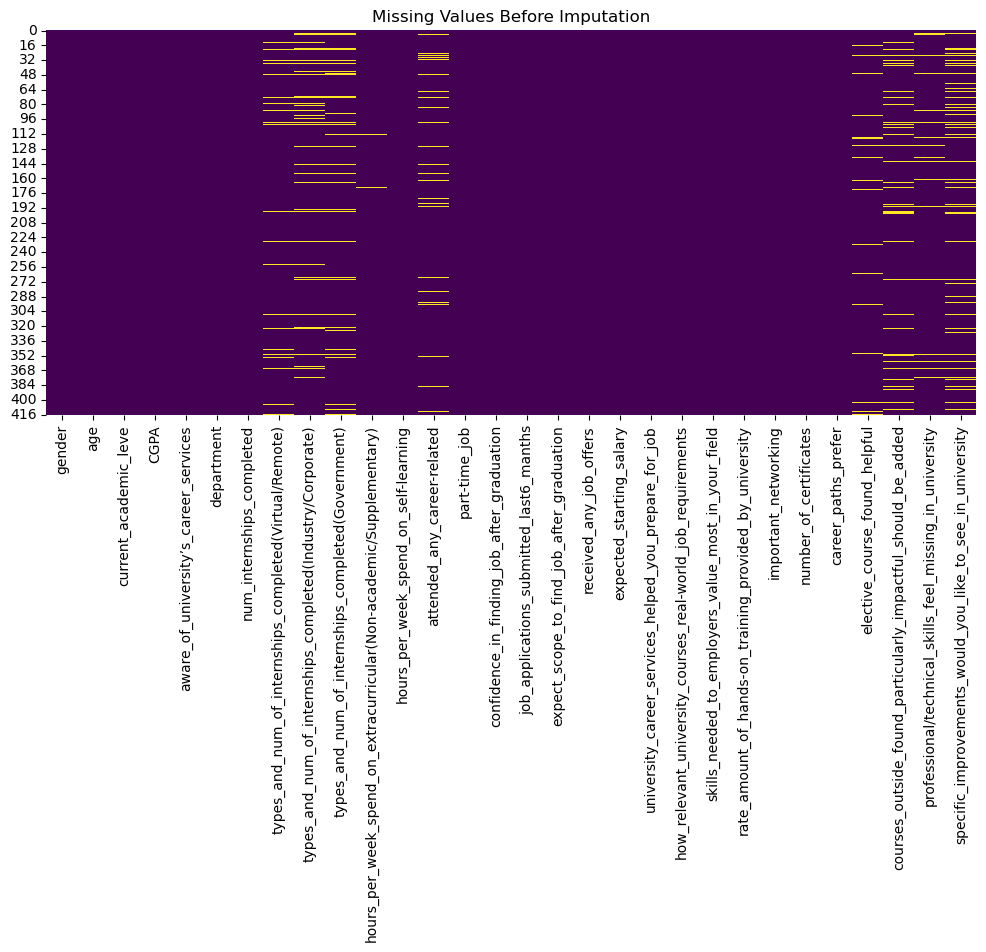

In [17]:
#visualization data Before transform null
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Imputation')
plt.show()

# replace null value in numeric columns using Knn imputer

In [18]:
# Step 1: Separate numeric and non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
non_numeric_df = df.select_dtypes(exclude=['number'])

# Step 2: Apply KNNImputer on numeric columns only
imputer = KNNImputer(n_neighbors=2)
numeric_imputed = imputer.fit_transform(numeric_df)

# Step 3: Reconstruct the numeric DataFrame
numeric_imputed_df = pd.DataFrame(numeric_imputed, columns=numeric_df.columns)

# Step 4: Combine back with non-numeric columns
df = pd.concat([numeric_imputed_df ,non_numeric_df], axis=1)

# replace null value in category columns using mode value

In [19]:
df = df.fillna({'attended_any_career-related': 0,
                'hours_per_week_spend_on_extracurricular(Non-academic/Supplementary)': df['hours_per_week_spend_on_extracurricular(Non-academic/Supplementary)'].mode(dropna=True)[0],
                'specific_improvements_would_you_like_to_see_in_university':'unKnown'
               })

In [20]:
elective_courses = {
    "Computing & Data Sciences": [
        "Convex Optimization", "Non-Linear and Combinatorial Optimization", "Multivariate Statistical Analysis",
        "Bayesian Statistics", "Data Compression Techniques", "Concurrent Algorithms and Data Structures",
        "Distributed Database Systems", "Advanced Database Systems"
    ],
    "Intelligent Systems": [
        "Speech Recognition", "Natural Language Understanding", "Embedded Machine Learning", "Intelligence Technology Trends",
        "Internet of Things II", "Knowledge-Base AI", "Virtual Reality", "Game Theory"
    ],
    "Cybersecurity": [
        "AI Security Issues", "Proactive Computer Security", "Software Security Engineering",
        "Blockchain and Security of Blockchain", "Cloud Computing Security", "Social Networks Analytics",
        "Internet of Things", "Mobile Computing"
    ],
    "Other": ["undefined"]
}

professional_technical_skills = {
    "Computing & Data Sciences": ["Advanced SQL query optimization and performance tuning",
    "MLOps and model deployment best practices",
    "Real-world data cleaning and preprocessing techniques",
    "Deep learning productionization and scaling models",
    "Cloud computing (AWS, GCP, Azure) for data science applications",
    "End-to-end machine learning pipeline development",
    "Handling big data with distributed computing (Spark, Hadoop)",
    "Advanced feature engineering strategies",
    "Practical A/B testing and experimentation in data science",
    "Time series forecasting beyond basic models",
    "Explainable AI (XAI) and model interpretability techniques",
    "Software engineering best practices for data scientists",
    "Building recommendation systems at scale",
    "Advanced NLP techniques and transformers",
    "Financial modeling and risk analysis using machine learning",
    "Real-world reinforcement learning applications",
    "Graph data science and knowledge graphs",
    "Geospatial data analysis and GIS applications",
    "Data security, privacy, and ethical AI principles",
    "Bias mitigation techniques in machine learning models",
    "Web scraping and data collection from various sources",
    "Handling real-time data streaming with Kafka and Flink",
    "Data science in production: monitoring and debugging models",
    "Optimizing deep learning models for efficiency",
    "Deployment of AI models using Docker and Kubernetes",
    "Serverless computing for machine learning applications",
    "CI/CD pipelines for machine learning projects",
    "Quantitative finance and algorithmic trading strategies",
    "Blockchain technology and smart contracts for AI",
    "Optimization techniques and mathematical programming",
    "Computer vision applications in industry",
    "Cybersecurity applications in data science",
    "Edge AI and on-device machine learning",
    "Developing AI for robotics and automation",
    "Advanced statistical modeling beyond linear regression",
    "Monte Carlo simulations and probabilistic programming",
    "Neural architecture search and hyperparameter tuning",
    "Product management skills for data-driven decision-making",
    "Domain-specific AI applications (healthcare, finance, retail, etc.)",
    "Practical project management and teamwork in data science",
    "Communicating data science findings to non-technical stakeholders",
    "Soft skills like negotiation, leadership, and business acumen",
    "Real-world case studies and industry-relevant projects",
    "Understanding legal and compliance aspects of AI",
    "High-performance computing for AI workloads",
    "Automating workflows with Python (Airflow, Prefect)",
    "Advanced mathematical foundations for AI",
    "AI ethics and regulatory frameworks",
    "Reproducibility and documentation in machine learning",
    "Version control and collaboration with GitHub",
    "Knowledge of DevOps practices for machine learning",
    "Business intelligence and data-driven decision-making",
    "Digital marketing analytics and customer insights",
    "Synthetic data generation techniques",
    "Explainability in deep learning models (SHAP, LIME, etc.)",
    "Advanced Bayesian statistics and probabilistic inference",
    "Human-in-the-loop AI and active learning",
    "Learning how to debug and optimize ML models in production",
    "Soft computing techniques like fuzzy logic and genetic algorithms",
    "Developing serverless AI applications using cloud functions",
    "API development and integration for AI models",
    "Bias detection and fairness auditing in ML models",
    "Data storytelling and presentation skills for stakeholders",
    "AI governance, policies, and responsible AI frameworks",
    "Data annotation and labeling best practices",
    "Graph neural networks and applications",
    "Deploying ML models on edge devices and mobile applications",
    "BigQuery, Snowflake, and other modern data warehousing tools",
    "Data lakes and lakehouses: implementation and best practices",
    "Practical reinforcement learning for business applications",
    "Transfer learning and fine-tuning pre-trained models",
    "Self-supervised learning and semi-supervised techniques",
    "Bioinformatics and AI in healthcare applications",
    "Cyber threat detection using machine learning",
    "Machine learning for industrial automation and IoT",
    "Multimodal AI combining text, vision, and speech data",
    "AI for social good: climate change, poverty, and healthcare",
    "Processing and analyzing satellite and remote sensing data",
    "Data monetization and leveraging AI for business growth",
    "AI-powered search and recommendation engines",
    "Scaling machine learning models across multiple GPUs",
    "Differential privacy and privacy-preserving machine learning",
    "Zero-shot and few-shot learning techniques",
    "GANs (Generative Adversarial Networks) and deep generative models",
    "Meta-learning and learning to learn",
    "AI-based automation for customer support (chatbots, virtual assistants)",
    "Conversational AI and advanced speech processing",
    "AI-assisted software development and code generation",
    "Quantum machine learning and future AI paradigms",
    "AI applications in creative industries (art, music, design)",
    "Human-centered AI and interaction design",
    "Ethical hacking and penetration testing with AI",
    "Machine learning compilers and model optimization (TVM, TensorRT)",
    "Cloud-native AI application development",
    "Advanced reinforcement learning for game AI",
    "Neuromorphic computing and bio-inspired AI",
    "Self-supervised representation learning",
    "AI-driven knowledge management systems",
    "Distributed AI models and federated architectures",
    "Synthetic media and deepfake detection techniques"
    ],
    "Intelligent Systems": [
        "Advanced Reinforcement Learning techniques for real-world applications",
    "Edge AI and on-device machine learning deployment",
    "Explainable AI (XAI) and AI model interpretability",
    "AI ethics, fairness, and bias mitigation",
    "AI for cybersecurity and anomaly detection",
    "Multi-agent systems and game theory applications",
    "Advanced robotics and real-world robotic implementation",
    "AI for healthcare, including medical image analysis and diagnostics",
    "Generative AI and Large Language Models (LLMs)",
    "Quantum computing and AI applications",
    "AI-powered financial modeling and algorithmic trading",
    "Graph Neural Networks (GNNs) and knowledge graphs",
    "Advanced computer vision and deep learning for image analysis",
    "Autonomous vehicle navigation and real-time decision-making",
    "Neurosymbolic AI and hybrid intelligence approaches",
    "Human-AI collaboration and interactive AI systems",
    "Cognitive computing and AI-driven automation",
    "Fuzzy logic and uncertainty modeling in AI",
    "Time series forecasting and AI-driven predictive analytics",
    "Natural Language Understanding (NLU) and Conversational AI",
    "Deployment of AI models in cloud environments",
    "High-performance computing for AI workloads",
    "AI for embedded systems and microcontrollers",
    "Data privacy and compliance in AI applications",
    "AI-powered recommendation systems and personalization",
    "Real-world reinforcement learning with autonomous agents",
    "Synthetic data generation and augmentation for AI training",
    "AI in Industrial IoT and predictive maintenance",
    "Cyber-physical systems and AI-driven smart environments",
    "Deep learning model optimization and pruning techniques",
    "Self-supervised and semi-supervised learning techniques",
    "AI for mental health applications and cognitive science",
    "AI-driven optimization techniques in logistics and supply chain",
    "Energy-efficient AI and sustainable computing",
    "AI in smart agriculture and food security",
    "Automated machine learning (AutoML) and hyperparameter tuning",
    "AI-driven fraud detection and risk assessment",
    "Bayesian optimization and probabilistic reasoning",
    "Real-time AI applications and low-latency model inference",
    "Personalized AI learning systems for education technology",
    "Reinforcement learning for robotic manipulation",
    "AI-powered behavioral analysis and psychological modeling",
    "AI applications in climate change and sustainability",
    "AI for virtual and augmented reality applications",
    "AI for law enforcement and legal analytics",
    "Graph-based machine learning for social network analysis",
    "AI for bioinformatics and genetic research",
    "Interactive AI for game development and storytelling",
    "Automated reasoning and theorem proving in AI",
    "AI for real-time traffic management and smart cities",
    "Reinforcement learning with sparse rewards and exploration strategies",
    "Meta-learning and few-shot learning techniques",
    "Self-learning AI systems and continual learning strategies",
    "Differential privacy and secure AI computations",
    "AI for financial auditing and regulatory compliance",
    "Advanced time-series analysis with deep learning",
    "AI in sports analytics and athlete performance prediction",
    "Data-centric AI and best practices for model improvement",
    "AI-powered document analysis and automation",
    "Low-power AI processing and AI acceleration hardware",
    "Adversarial machine learning and model robustness",
    "AI-driven music generation and computational creativity",
    "AI-powered satellite image analysis and geospatial intelligence",
    "Behavioral economics and AI-driven decision making",
    "Hardware-aware AI model optimization",
    "Neuromorphic computing and brain-inspired AI architectures",
    "AI-driven legal technology and automated contract analysis",
    "Computational neuroscience and AI-inspired cognition models",
    "Hyperparameter tuning at scale for deep learning models",
    "Advanced AI benchmarking and performance testing",
    "Sensor fusion for AI-driven autonomous systems",
    "Few-shot and zero-shot learning approaches",
    "Transfer learning in real-world AI applications",
    "Self-evolving AI models with minimal human intervention",
    "Privacy-preserving AI and federated learning",
    "AI-powered 3D reconstruction and spatial computing",
    "AI for supply chain optimization and logistics",
    "Autonomous drone navigation with AI and computer vision",
    "Ethical considerations in autonomous AI decision-making",
    "Cross-domain AI applications and domain adaptation",
    "Bayesian deep learning for uncertainty estimation",
    "AI-driven sentiment analysis for social media monitoring",
    "AI-powered resume screening and automated hiring",
    "Medical AI applications beyond imaging, like drug discovery",
    "AI-enhanced security systems for threat detection",
    "Legal and regulatory frameworks for AI governance",
    "AI for accessibility and assistive technologies",
    "Predictive analytics for crisis management and disaster response",
    "AI for optimizing large-scale power grids and renewable energy",
    "Adaptive learning systems using AI in education",
    "Multi-modal AI-driven fake news detection",
    "AI in neuroprosthetics and rehabilitation technology",
    "Intelligent tutoring systems with adaptive learning",
    "AI-powered simulation environments for training robots",
    "AI-enhanced biometric recognition and authentication",
    "Intelligent search engines and AI-driven knowledge retrieval",
    "Advanced AI-driven cybersecurity threat detection",
    "Generative design in engineering using AI algorithms",
    "AI-powered business analytics and strategic decision-making",
    "Open-ended AI creativity models for art and media"
    ],
    "Cybersecurity": [
       "Advanced Penetration Testing and Exploit Development",
    "Real-world Incident Response and Digital Forensics",
    "Cyber Threat Intelligence and Threat Hunting",
    "Security Automation with Python and Bash Scripting",
    "Cloud Security (AWS, Azure, Google Cloud)",
    "Red Team vs. Blue Team Practical Training",
    "Zero Trust Security Architecture Implementation",
    "DevSecOps and Secure Software Development Lifecycle (SDLC)",
    "Hands-on Malware Analysis and Reverse Engineering",
    "Cyber Risk Management and Compliance Frameworks (NIST, ISO 27001, GDPR)",
    "Operational Technology (OT) and Industrial Control System (ICS) Security",
    "Advanced Web Application Security and Secure Coding Practices",
    "Mobile and IoT Security",
    "Blockchain and Smart Contract Security",
    "Dark Web Intelligence and OSINT Investigations",
    "Network Security Hardening and Intrusion Detection Systems",
    "Security in Artificial Intelligence and Machine Learning Models",
    "Cybersecurity Awareness and Social Engineering Defense",
    "Enterprise Security Governance and Policy Implementation",
    "Cybersecurity Project Management and Leadership",
    "Cloud Penetration Testing and Security Auditing",
    "Threat Modeling and Secure System Design",
    "Identity and Access Management (IAM) Implementation",
    "Wireless Network Security and Ethical Hacking",
    "Digital Privacy and Anonymity Techniques",
    "Honeypots and Deception Security Techniques",
    "Cybersecurity for Financial Services and Banking Systems",
    "Smart City and Critical Infrastructure Security",
    "Cybersecurity Risk Assessment and Quantitative Analysis",
    "Cybercrime Investigation and Digital Evidence Handling",
    "AI-Powered Cyber Threat Detection and Response",
    "Advanced Phishing Defense and Email Security",
    "Real-world Security Operations Center (SOC) Training",
    "Supply Chain Cybersecurity and Vendor Risk Management",
    "Automated Threat Intelligence Processing",
    "Incident Handling and Crisis Response Exercises",
    "Secure API Development and API Security Testing",
    "Threat Intelligence Sharing and Collaborative Cyber Defense",
    "DDoS Attack Mitigation Strategies",
    "Secure Firmware and Embedded Systems Security",
    "Digital Forensic Tools and Analysis Techniques",
    "Cyber Insurance and Legal Aspects of Cybersecurity",
    "Container Security (Docker, Kubernetes)",
    "Security Architecture for Microservices and Serverless Computing",
    "Cybersecurity for Government and Military Operations",
    "Cross-Site Scripting (XSS) and SQL Injection Prevention",
    "Cloud Security Posture Management (CSPM)",
    "Advanced Network Packet Analysis and Sniffing",
    "Zero Trust Security Architecture Implementation",
    "Security Testing in Agile and DevOps Environments",
    "Cybersecurity for AI and Deep Learning Models",
    "Mobile Application Reverse Engineering and Security Testing",
    "Automated Compliance Monitoring and Security Auditing",
    "DNS Security and Secure Network Architecture",
    "MITRE ATT&CK Framework Application",
    "Zero-Day Exploits and Advanced Persistent Threats (APTs)",
    "Cryptographic Protocols and Encryption Standards",
    "Security of Edge Computing and 5G Networks",
    "Risk-Based Authentication and Multi-Factor Authentication (MFA)",
    "IoT Device Hacking and Security Countermeasures",
    "Secure Code Review and Static Code Analysis",
    "Incident Analysis and Log Correlation Techniques",
    "Ransomware Attack Prevention and Recovery",
    "Web3 and Decentralized Security",
    "Security Metrics and Cybersecurity ROI Analysis",
    "Cybersecurity in Healthcare and Medical Device Security",
    "PCI-DSS Compliance and Payment System Security",
    "AI-Driven Security Automation and SOAR Platforms",
    "Hardware Security and Physical Penetration Testing",
    "Security Implications of Quantum Computing",
    "Bypassing Antivirus and EDR Detection Mechanisms",
    "Legal and Ethical Considerations in Ethical Hacking",
    "Cybersecurity for Autonomous Vehicles and Smart Transportation",
    "Insider Threat Detection and Prevention",
    "Advanced Social Engineering Techniques and Countermeasures",
    "GDPR, CCPA, and Global Data Privacy Regulations",
    "Cybersecurity for SaaS, PaaS, and IaaS Platforms",
    "Deepfake Detection and Synthetic Media Security",
    "Threat Actor Attribution and Cyber Espionage Analysis",
    "ICS/SCADA Cybersecurity Best Practices",
    "Darknet Research and Cybercriminal Tactics",
    "Advanced Persistent Threat (APT) Simulation and Defense",
    "Security Awareness Training for End Users",
    "Forensic Analysis of Mobile Devices and Cloud Storage",
    "Cybersecurity Investment and Budget Planning",
    "AI-Based Behavioral Analysis for Anomaly Detection",
    "Blockchain-Based Identity and Authentication Systems",
    "Cybersecurity Incident Simulation and Tabletop Exercises",
    "Disaster Recovery and Business Continuity Planning",
    "Password Cracking and Secure Authentication Mechanisms",
    "Securing SaaS Applications and Third-Party Integrations",
    "Red Teaming for Advanced Penetration Testing",
    "Cybersecurity for Robotics and Autonomous Systems",
    "Security Testing for AI-Generated Code",
    "Steganography and Covert Communication Analysis",
    "ICS/SCADA Security Incident Response Planning",
    "Using Machine Learning for Cyber Threat Analysis",
    "Threat Intelligence Platforms and Data Correlation",
    "Reverse Engineering Exploits and Vulnerability Research",
    "Digital Resilience and Cyber Warfare Strategies"
    ],
    "Other": ["undefined"]
}

courses_outside = {
    "Computing & Data Sciences": [
       "Machine Learning – Andrew Ng (Coursera, Stanford University)",
    "Deep Learning Specialization – Andrew Ng (Coursera, DeepLearning.AI)",
    "AI for Everyone – Andrew Ng (Coursera, DeepLearning.AI)",
    "Practical Deep Learning for Coders – fast.ai",
    "TensorFlow Developer Certification – Google & TensorFlow",
    "PyTorch for Deep Learning – Udacity",
    "Reinforcement Learning Specialization – University of Alberta (Coursera)",
    "Natural Language Processing with Deep Learning – Stanford University (YouTube)",
    "Generative AI with LLMs – DeepLearning.AI (Coursera)",
    "IBM AI Engineering Professional Certificate – IBM (Coursera)",

    # Data Science & Analytics Courses
    "Data Science Specialization – Johns Hopkins University (Coursera)",
    "Python for Data Science and Machine Learning – Udemy",
    "Applied Data Science with Python – University of Michigan (Coursera)",
    "Data Science Bootcamp – DataCamp",
    "SQL for Data Science – University of California, Davis (Coursera)",
    "Data Science with R – HarvardX (edX)",
    "Practical Data Science on AWS – Amazon AWS Academy",
    "Introduction to Computational Thinking and Data Science – MIT OpenCourseWare",
    "Statistics for Data Science and Business Analysis – Udemy",
    "Big Data Analytics with Spark – University of California, Berkeley (edX)",

    # Programming & Software Engineering
    "CS50: Introduction to Computer Science – Harvard University (edX)",
    "Python for Everybody – University of Michigan (Coursera)",
    "Java Programming and Software Engineering Fundamentals – Duke University (Coursera)",
    "Data Structures and Algorithms – Udacity",
    "Object-Oriented Programming in Java – University of California, San Diego (Coursera)",
    "C++ for Programmers – Udemy",
    "Advanced Python – Pluralsight",
    "Web Scraping with Python and Selenium – Udemy",
    "Git and GitHub for Beginners – Udemy",
    "Automate the Boring Stuff with Python – Al Sweigart (Udemy)",

    # Data Visualization & Business Intelligence
    "Tableau for Data Science – Udemy",
    "Power BI for Business Analytics – Udemy",
    "Data Visualization with Python – DataCamp",
    "Data Storytelling and Visualization – Coursera",
    "Advanced Excel for Data Analysis – Udemy",
    "Business Analytics with Excel – University of Illinois (Coursera)",
    "Dashboards and Data Insights with Power BI – Pluralsight",
    "D3.js for Data Visualization – Udacity",
    "Data Journalism and Storytelling – Google News Initiative",
    "Financial Modeling and Visualization – Corporate Finance Institute (CFI)",

    # Big Data & Cloud Computing
    "Big Data and Machine Learning on AWS – Coursera",
    "Google Cloud Data Engineering – Google Cloud (Coursera)",
    "Azure AI Fundamentals – Microsoft (Udacity)",
    "Apache Spark for Big Data Processing – Udemy",
    "Data Engineering on Google Cloud – Pluralsight",
    "Data Pipelines with Apache Airflow – Udacity",
    "Kubernetes for Machine Learning – Udacity",
    "Data Warehousing with Snowflake – Coursera",
    "Cloud Computing Basics – Amazon AWS Academy",
    "Hadoop and MapReduce for Big Data – Udacity",

    # Time Series & Financial Data Analysis
    "Time Series Forecasting with Python – Udemy",
    "Quantitative Finance and Algorithmic Trading – Coursera",
    "Applied Time Series Analysis – University of Washington (Coursera)",
    "Financial Risk Analytics – Stanford University (edX)",
    "Algorithmic Trading and Quantitative Analysis – Udemy",
    "Cryptography and Blockchain Basics – University of Nicosia (Coursera)",
    "Investment Analytics and Data Science – University of Chicago (edX)",
    "Risk Modeling and Credit Scoring – DataCamp",
    "Portfolio Management and Machine Learning – Udacity",
    "Cryptocurrency and Blockchain – MIT Sloan (edX)",

    # Natural Language Processing (NLP)
    "NLP with Python – Udemy",
    "Deep Learning for NLP – Coursera",
    "Speech Recognition and Processing – Udacity",
    "Text Mining and Sentiment Analysis – DataCamp",
    "Transformers for NLP – Hugging Face (Coursera)",
    "Chatbot Development with Rasa – Udemy",
    "Question Answering with Transformers – DeepLearning.AI (Coursera)",
    "Named Entity Recognition and Text Classification – Udacity",
    "Machine Translation with Deep Learning – Google AI (YouTube)",
    "Ethical AI and Bias in NLP – IBM AI Ethics (Coursera)",

    # Reinforcement Learning & Optimization
    "Reinforcement Learning – University of Alberta (Coursera)",
    "Decision Making with Markov Models – Stanford University (edX)",
    "Game Theory and Multi-Agent Systems – Udacity",
    "AI in Robotics and Reinforcement Learning – Udacity",
    "Optimization for Machine Learning – MIT OpenCourseWare",
    "Neural Networks and Deep Reinforcement Learning – Udacity",
    "Bayesian Optimization and Probabilistic Modeling – Coursera",
    "Multi-Armed Bandits and A/B Testing – DataCamp",
    "Genetic Algorithms in AI – Udemy",
    "Learning from Demonstration in AI – DeepMind (YouTube)",

    # Ethical AI, Responsible Data Science & Soft Skills
    "AI Ethics and Fairness – IBM (Coursera)",
    "Data Privacy and GDPR Compliance – Udemy",
    "Responsible AI in Practice – Microsoft AI Ethics (Coursera)",
    "Explainable AI (XAI) and Model Interpretability – Udacity",
    "Social Implications of AI – MIT Sloan (edX)",
    "Bias and Fairness in AI Models – Google AI Ethics (YouTube)",
    "Data Science for Social Good – University of Chicago (edX)",
    "Critical Thinking for Data Science – HarvardX (edX)",
    "Communication Skills for Data Science – Udacity",
    "Leadership and Project Management for Data Science – Coursera",

    # IoT, Edge Computing & Emerging Technologies
    "IoT and Data Science – Udacity",
    "Edge AI and On-Device Machine Learning – Google AI (YouTube)",
    "Quantum Computing for Machine Learning – IBM (Coursera)",
    "Wearable Technology and AI – Stanford University (edX)",
    "5G and AI Applications – Udacity",
    "Robotics with AI – MIT OpenCourseWare",
    "AI for Medical Diagnosis – Stanford University (Coursera)",
    "AI for Self-Driving Cars – Udacity",
    "AI and Climate Change – DeepMind (YouTube)",
    "Future Trends in AI and Data Science – Oxford University (edX)"
    ],
    "Intelligent Systems": ["Artificial Intelligence (CS50 AI) – Harvard University (edX)",
    "Machine Learning – Andrew Ng (Coursera, Stanford University)",
    "Deep Learning Specialization – Andrew Ng (Coursera, DeepLearning.AI)",
    "Reinforcement Learning Specialization – University of Alberta (Coursera)",
    "AI for Everyone – Andrew Ng (Coursera, DeepLearning.AI)",
    "TensorFlow Developer Certification – Google & TensorFlow",
    "PyTorch for Deep Learning – Udacity",
    "Generative AI with LLMs – DeepLearning.AI (Coursera)",
    "IBM AI Engineering Professional Certificate – IBM (Coursera)",
    "Natural Language Processing with Deep Learning – Stanford University (YouTube)",
    "Self-Driving Cars Specialization – University of Toronto (Coursera)",
    "Robotics Specialization – University of Pennsylvania (Coursera)",
    "Computer Vision and Image Processing – Udacity",
    "Edge AI and On-Device Machine Learning – Google AI (YouTube)",
    "AI in Medicine – Stanford University (Coursera)",
    "AI and Cybersecurity – University of Maryland (Coursera)",
    "AI for Healthcare – MIT OpenCourseWare",
    "AI in Finance – University of Chicago (edX)",
    "Autonomous Systems and Reinforcement Learning – Udacity",
    "AI in Smart Cities and IoT – MIT Sloan (edX)",
    "Introduction to Computational Thinking and Data Science – MIT OpenCourseWare",
    "Big Data and AI on AWS – Amazon AWS Academy",
    "Cloud AI and ML Engineering – Google Cloud (Coursera)",
    "Data Science and AI Ethics – IBM (Coursera)",
    "Explainable AI (XAI) – Udacity",
    "AI for Climate Change and Sustainability – DeepMind (YouTube)",
    "Introduction to Quantum Computing and AI – IBM (Coursera)",
    "Multi-Agent Systems and Game Theory – Udacity",
    "Neural Networks and Deep Learning – Udacity",
    "Applied AI for Business – University of London (Coursera)",
    "AI Product Management – Duke University (Coursera)",
    "AI for Decision Making – University of Washington (Coursera)",
    "Speech Recognition and Audio Processing – Udacity",
    "AI-powered Chatbot Development – Udemy",
    "Large-Scale AI Systems – Google Cloud (Coursera)",
    "AI-driven Automation and RPA – Udacity",
    "Cyber-Physical Systems and AI – University of Illinois (Coursera)",
    "Human-Robot Interaction – Stanford University (edX)",
    "Bayesian Methods for AI – Coursera",
    "Ethical AI and Bias Mitigation – Microsoft AI Ethics (Coursera)",
    "Advanced Computer Vision – Stanford University (YouTube)",
    "AI for Edge Devices – NVIDIA Deep Learning Institute",
    "Embedded AI Systems – Udacity",
    "Swarm Intelligence and Evolutionary Computing – Coursera",
    "AI in Industrial Automation – MIT OpenCourseWare",
    "AI for Space Exploration – NASA Open Learning",
    "AI-powered Drug Discovery – Harvard University (edX)",
    "Autonomous Drones and AI Navigation – Udacity",
    "AI for Smart Manufacturing – University of California, Berkeley (edX)",
    "AI for Natural Disaster Prediction – Google AI (YouTube)",
    "AI-powered Personal Assistants – DeepLearning.AI (Coursera)",
    "Biometric Recognition and AI Security – Udacity",
    "AI in Creative Arts and Music Generation – Stanford (edX)",
    "AI for Augmented Reality and VR – Udemy",
    "AI for Wearable Technology – University of California, San Diego (Coursera)",
    "AI-driven Traffic Optimization – MIT Sloan (edX)",
    "AI-powered Supply Chain Optimization – Coursera",
    "AI and Mental Health Applications – DeepMind (YouTube)",
    "Ethical Hacking and AI-driven Security – Udacity",
    "Predictive Maintenance with AI – University of Toronto (Coursera)",
    "AI for Customer Experience and Chatbots – Udemy",
    "AI and Blockchain Applications – University of Nicosia (Coursera)",
    "AI for Legal Tech and Compliance – HarvardX (edX)",
    "AI-powered Language Translation – Google AI (YouTube)",
    "Multi-Modal AI – DeepLearning.AI (Coursera)",
    "Fuzzy Logic and AI Decision Making – Stanford University (edX)",
    "AI-powered Sentiment Analysis – Udacity",
    "AI in Journalism and Automated Reporting – Google News Initiative",
    "Ethical Hacking and AI-driven Security – Udacity",
    "AI for Personalized Medicine – Johns Hopkins University (Coursera)",
    "Cognitive Computing and AI – IBM (Coursera)",
    "Quantum AI and Hybrid Intelligence – IBM (Coursera)",
    "AI-powered Fraud Detection – University of Illinois (Coursera)",
    "Neurosymbolic AI and Hybrid Approaches – MIT OpenCourseWare",
    "AI-powered Anomaly Detection – Udacity",
    "AI for Psychological Profiling – Stanford University (edX)",
    "AI in Sports Analytics – University of Chicago (edX)",
    "Meta-Learning and Few-Shot Learning – DeepLearning.AI (Coursera)",
    "AI for Predictive Analytics – Duke University (Coursera)",
    "AI-powered Recommendation Systems – Udemy",
    "AI in Agriculture and Food Security – Google AI (YouTube)",
    "AI in Marine Science and Underwater Exploration – MIT Sloan (edX)",
    "AI for Retail and E-commerce – Coursera",
    "AI for Autonomous Trading – University of Chicago (edX)",
    "AI for Personalized Learning and EdTech – Stanford University (YouTube)",
    "AI-driven HR and Talent Management – Udacity",
    "AI-powered Resume Screening and Recruitment – Coursera",
    "AI in Political Science and Public Policy – HarvardX (edX)",
    "AI for Behavioral Analysis – University of Toronto (Coursera)",
    "AI for Wildlife Conservation – DeepMind (YouTube)",
    "AI-driven Simulation and Digital Twins – Microsoft AI (Coursera)",
    "AI for Video Analytics and Surveillance – Udemy",
    "AI for Interactive Storytelling and Game AI – Udacity",
    "AI-powered Social Media Monitoring – Google AI (YouTube)",
    "AI for Smart Contracts and DeFi – University of Nicosia (Coursera)",
    "AI-powered Personalized Advertising – MIT OpenCourseWare",
    "AI for Urban Planning and Smart Cities – Coursera",
    "AI-driven Financial Portfolio Management – University of Chicago (edX)",
    "AI for Astronomy and Space Science – NASA Open Learning",
    "AI in Autonomous Robotics and Swarm Intelligence – Stanford University (edX)"
    ],
    "Cybersecurity": [
    "Certified Ethical Hacker (CEH) – EC-Council",
    "Offensive Security Certified Professional (OSCP) – Offensive Security",
    "CompTIA Security+ – CompTIA",
    "Certified Information Systems Security Professional (CISSP) – (ISC)²",
    "Certified Cloud Security Professional (CCSP) – (ISC)²",
    "Cybersecurity Fundamentals – IBM (Coursera)",
    "Practical Ethical Hacking – TCM Security (Udemy)",
    "The Complete Cyber Security Course – Nathan House (Udemy)",
    "Penetration Testing and Ethical Hacking – Cybrary",
    "Hacking Web Applications with Burp Suite – PortSwigger",
    "Digital Forensics and Cyber Investigation – University of Maryland (Coursera)",
    "Cybersecurity for Business – University of Colorado (Coursera)",
    "Cyber Threat Intelligence – Mandiant Academy",
    "Red Team Operations – Pentester Academy",
    "Blue Team Training – CyberDefenders",
    "Malware Analysis and Reverse Engineering – Udemy",
    "Cloud Security Basics – Google Cloud (Coursera)",
    "Security Engineering – University of London (Coursera)",
    "Python for Cybersecurity – Cybrary",
    "Network Security Essentials – Fortinet",
    "Security Awareness and Social Engineering – KnowBe4",
    "Ethical Hacking for Beginners – StationX",
    "CISSP Certification Training – Pluralsight",
    "Cybersecurity Law and Policy – Georgetown University (Coursera)",
    "Threat Hunting and Adversary Emulation – Black Hills InfoSec",
    "Cybersecurity Incident Management – Harvard University (edX)",
    "Advanced Web Application Penetration Testing – SANS Institute",
    "Wireless Network Security – Udemy",
    "Cloud Security Hands-On – AWS Security Training",
    "AI and Cybersecurity – Stanford University (Coursera)",
    "IoT Security Fundamentals – University of Colorado (Coursera)",
    "Dark Web and Cybercrime Investigations – Udemy",
    "CompTIA CySA+ (Cybersecurity Analyst) – CompTIA",
    "Practical Packet Analysis with Wireshark – Udemy",
    "Cryptography and Network Security – Stanford University (Coursera)",
    "Cybersecurity Leadership and Strategy – Wharton Online",
    "Digital Privacy and Anonymity – Tor Project Training",
    "Computer Hacking Forensics Investigator (CHFI) – EC-Council",
    "Cloud Penetration Testing – Offensive Security",
    "Threat Modeling and Secure Design – Microsoft Security Training",
    "Practical Malware Analysis – Pluralsight",
    "SOC Analyst Training – CyberDefenders",
    "Kali Linux for Ethical Hackers – Udemy",
    "Security Automation with Python – Cybrary",
    "Zero Trust Security Architecture – Udemy",
    "Cybersecurity Compliance and Frameworks – NIST Training",
    "Bug Bounty Hunting – HackerOne Training",
    "Mobile Application Security – NowSecure Academy",
    "Hacking and Securing APIs – APIsec University",
    "Critical Infrastructure Cybersecurity – US Department of Homeland Security (DHS)",
    "SCADA and Industrial Control System (ICS) Security – SANS Institute",
    "Darknet and OSINT Investigations – The OSINT Academy",
    "Incident Handling and Response – EC-Council",
    "Identity and Access Management (IAM) – Udemy",
    "Red Team vs Blue Team Cybersecurity – MITRE ATT&CK Training",
    "Exploit Development and Advanced Penetration Testing – Offensive Security",
    "Security Operations Center (SOC) Fundamentals – CyberWarrior Academy",
    "CISM (Certified Information Security Manager) – ISACA",
    "Data Breach Investigations – Verizon Data Breach Training",
    "Security Testing in DevOps – DevSecOps Training",
    "Cybersecurity Analytics – IBM (Coursera)",
    "Wi-Fi Hacking and Wireless Penetration Testing – Udemy",
    "Docker and Kubernetes Security – Udacity",
    "Google Cybersecurity Professional Certificate – Google (Coursera)",
    "Cyber Warfare and National Security – NATO Cyber Defence Training",
    "Digital Evidence and Cybercrime Investigation – Udemy",
    "Linux Hardening and Security – Red Hat Training",
    "Mobile and IoT Security – Georgia Tech (Coursera)",
    "AI-Based Threat Detection – MIT (edX)",
    "Cybersecurity Awareness for Executives – Harvard Business School",
    "Cloud Security Posture Management (CSPM) – Udemy",
    "Certified Kubernetes Security Specialist (CKS) – CNCF",
    "Phishing and Social Engineering Defense – KnowBe4 Training",
    "Network Intrusion Detection with Snort – Udemy",
    "Cybersecurity for Smart Cities – University of California, Berkeley (edX)",
    "GDPR and Data Privacy Compliance – Udemy",
    "Cybersecurity in Healthcare – John Hopkins University (Coursera)",
    "Honeypots and Deception Security – Pluralsight",
    "Red Teaming for Enterprise Security – MITRE Engenuity",
    "Digital Fraud Investigation – University of Toronto (Coursera)",
    "Cybersecurity for Financial Services – NYU Tandon School of Engineering",
    "Dark Web Investigations and Cyber Threats – Udemy",
    "Enterprise Security Architecture – TOGAF Training",
    "Software Security and Secure Coding – Secure Code Warrior",
    "Ethical Hacking Masterclass – The Cyber Mentor",
    "CISA (Certified Information Systems Auditor) – ISACA",
    "Public Key Infrastructure (PKI) and Digital Certificates – Udemy",
    "Ransomware Prevention and Response – SANS Institute",
    "Cybersecurity for Artificial Intelligence – IBM (Coursera)",
    "Threat Intelligence Analysis – Recorded Future Academy",
    "ICS/SCADA Cybersecurity – Udemy",
    "Metasploit for Penetration Testing – Offensive Security",
    "DevSecOps Essentials – AWS Security Training",
    "AI-Driven Cyber Threat Hunting – Carnegie Mellon University",
    "Risk Assessment and Cyber Insurance – Udemy",
    "Darknet Intelligence and Cybercrime Monitoring – Udemy",
    "Cyber Resilience and Business Continuity – MIT Sloan (edX)",
    "IoT Hacking and Security – Udemy",
    "Application Security Engineering – Udacity",
    "Cybersecurity Governance and Risk Management – Coursera"
    ],
    "Other": ["undefined"]
}

In [21]:
# Function to fill NaN values with 4 random courses from the respective department for a single column
def fill_na_with_random_courses(df, replaced_value, target_column):
    for idx, row in df.iterrows():
        if pd.isna(row[target_column]):  # Check if the current column has a NaN value
            department = row.get('department')  # Get the department for the current row
            courses = replaced_value.get(department, ["undefined"])  # Get courses based on the department

            if len(courses) >= 4:
                selected_courses = random.sample(courses, 4)  # Select 4 random courses
            else:
                selected_courses = courses  # If fewer than 4, use whatever courses are available

            # Set the value of the target column
            df.at[idx, target_column] = ', '.join(selected_courses)

    return df


In [22]:
df = fill_na_with_random_courses(
    df, 
    replaced_value=elective_courses,  # Pass the dictionary containing courses for each department
    target_column='elective_course_found_helpful'  # Specify the target column name
)

df = fill_na_with_random_courses(
    df, 
    replaced_value=courses_outside,  # Pass the dictionary containing courses for each department
    target_column='courses_outside_found_particularly_impactful_should_be_added'  # Specify the target column name
)


df = fill_na_with_random_courses(
    df, 
    replaced_value=professional_technical_skills,  # Pass the dictionary containing courses for each department
    target_column='professional/technical_skills_feel_missing_in_university'  # Specify the target column name
)

In [23]:
df.isnull().sum() 

CGPA                                                                   0
types_and_num_of_internships_completed(Virtual/Remote)                 0
types_and_num_of_internships_completed(Industry/Corporate)             0
types_and_num_of_internships_completed(Government)                     0
confidence_in_finding_job_after_graduation                             0
how_relevant_university_courses_real-world_job_requirements            0
important_networking                                                   0
gender                                                                 0
age                                                                    0
current_academic_leve                                                  0
aware_of_university’s_career_services                                  0
department                                                             0
num_internships_completed                                              0
hours_per_week_spend_on_extracurricular(Non-academi

In [24]:
unique_values = {col: df[col].unique() for col in df.columns}

# Display the unique values with a line break between each column
for col, values in unique_values.items():
    print(f"Unique values in '{col}':\n{values}\n")

Unique values in 'CGPA':
[2.     3.38   2.62   3.43   2.77   2.34   3.42   2.03   3.67   3.51
 2.01   3.22   3.89   3.7    2.79   3.08   3.34   3.52   2.68   3.9
 3.3409 3.4    1.66   2.15   2.66   2.8    3.     3.55   2.83   2.588
 3.29   2.84   2.52   3.16   1.65   3.54   1.68   3.6    2.48   1.79
 2.32   3.5    2.51   3.969  3.03   3.58   2.7    2.81   2.27   3.868
 3.75   1.62   1.87   1.9    3.333  2.95   1.8    2.2    3.8    3.2
 2.07   2.85   2.86   3.66   3.1    3.17   3.81   2.45   3.498  2.6
 3.62   1.84   2.12   3.7185 2.38   1.51   2.09   3.45   1.88   1.71
 2.53   3.625  3.65   1.96   3.12   3.13   2.1    2.13   3.28   2.49
 2.97   2.75   2.96   3.39   2.33   2.58   1.57   2.56   2.78   3.24
 3.19   2.92   2.57   3.26   3.3    2.21   2.54   3.61   1.54   2.25
 3.79   3.74   3.18   3.64   3.95   3.77   3.96   1.89   2.87   1.92
 3.93   2.3    3.04   1.97   3.27   1.56   3.09   2.88   2.82   3.86
 3.88   2.9    1.53   3.23   3.53   3.56   1.73   3.76   2.46   3.92
 1.58   2.

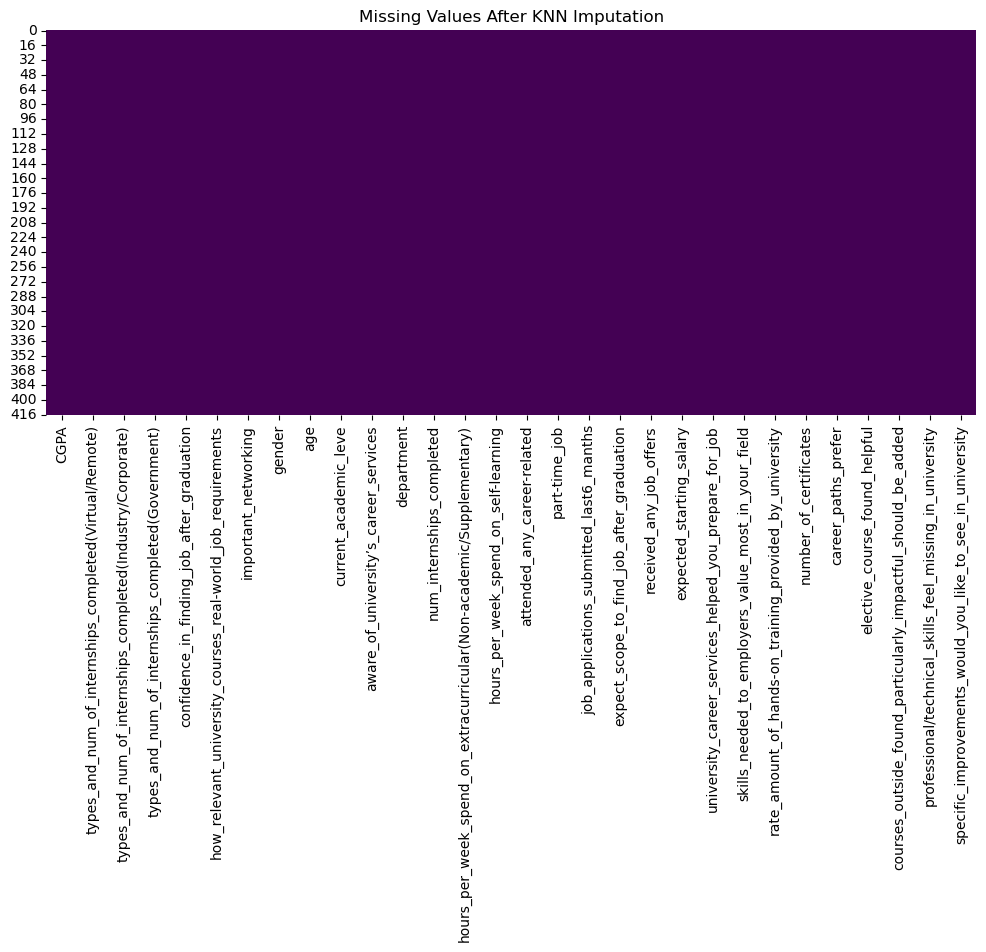

In [25]:
#visualization data Before transform null
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After KNN Imputation')
plt.show()

In [26]:

df.to_excel("cleaned_data.xlsx", index=False)
df

,CGPA,types_and_num_of_internships_completed(Virtual/Remote),types_and_num_of_internships_completed(Industry/Corporate),types_and_num_of_internships_completed(Government),confidence_in_finding_job_after_graduation,how_relevant_university_courses_real-world_job_requirements,important_networking,gender,age,current_academic_leve,...,expected_starting_salary,university_career_services_helped_you_prepare_for_job,skills_needed_to_employers_value_most_in_your_field,rate_amount_of_hands-on_training_provided_by_university,number_of_certificates,career_paths_prefer,elective_course_found_helpful,courses_outside_found_particularly_impactful_should_be_added,professional/technical_skills_feel_missing_in_university,specific_improvements_would_you_like_to_see_in_university
0,2.00,2.0,0.0,2.0,5.0,1.0,2.0,Male,18–20,Fourth Level,...,6750,Slightly,"Communication skills, Critical thinking, Teamwork",Insufficient,3-5,"Starting my own business (Entrepreneurship), J...","Data Compression Techniques, Distributed Datab...",Business Analytics with Excel – University of ...,Monte Carlo simulations and probabilistic prog...,More emphasis on deploying ML models into prod...
1,3.38,1.0,1.0,0.0,3.0,4.0,5.0,Male,18–20,Fourth Level,...,5250,Very much,"Critical thinking, Teamwork, Problem-solving",Adequate (suitable),More than 10,"Working in a local company, Starting my own bu...","Cloud Computing Security, Software Security En...",Cybersecurity for Financial Services – NYU Tan...,Darknet Research and Cybercriminal Tactics,Development of a university-led cybersecurity ...
2,2.62,2.0,0.0,2.0,4.0,2.0,3.0,Male,18–20,Fourth Level,...,4250,Very much,"Problem-solving, Communication skills, Teamwork",More than enough,0,"Freelancing / Self-employment, Working in a lo...","Social Networks Analytics, Mobile Computing, I...",Risk Assessment and Cyber Insurance – Udemy,Steganography and Covert Communication Analysis,Courses on securing software supply chains and...
3,3.43,1.0,0.0,0.5,3.0,2.0,4.0,Male,21–23,Third Level,...,150,Not at all,"Technical skills, Critical thinking, Problem-s...",Insufficient,3-5,"Joining a multinational corporation, Starting ...","AI Security Issues, Blockchain and Security of...",Web applications penetration testing,"Red Team vs. Blue Team Practical Training, Cyb...",unKnown
4,2.77,2.0,0.0,1.0,2.0,2.0,3.0,Male,21–23,Fourth Level,...,200,Slightly,"Communication skills, Problem-solving, Teamwork",Insufficient,1-2,"Working in a local company, Joining a multinat...","Convex Optimization, Non-Linear and Combinator...",All the courses i had taken where more impactf...,"Version control and collaboration with GitHub,...",More trainings per academic year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,3.27,2.0,1.0,0.0,3.0,5.0,3.0,Male,21–23,Fourth Level,...,5000,Not at all,"Technical skills, Communication skills, Critic...",Adequate (suitable),3-5,Joining a multinational corporation,"Convex Optimization, Non-Linear and Combinator...",GANs LLMs,Leaning more into the AI side of Data Science,unKnown
413,3.45,0.0,1.0,1.0,4.0,3.0,4.0,Male,21–23,Third Level,...,200,Moderately,"Technical skills, Critical thinking, Problem-s...",Adequate (suitable),3-5,"Joining a multinational corporation, Starting ...",undefined,No,Quality control,More practical learning
414,2.90,0.0,2.0,2.0,3.0,5.0,2.0,Male,21–23,Third Level,...,10000,Moderately,"Problem-solving, Leadership, Technical skills",Adequate (suitable),1-2,"Freelancing / Self-employment, Working in a lo...","Natural Language Understanding, Embedded Machi...",AI for Augmented Reality and VR – Udemy,Differential privacy and secure AI computations,Advanced AI research fellowships and industry-...
415,2.52,0.0,1.0,0.0,5.0,3.0,5.0,Female,24–26,Fourth Level,...,6500,Very much,"Technical skills, Problem-solving, Communicati...",Adequate (suitable),1-2,"Working in a local company, Joining a multinat...","Blockchain and Security of Blockchain, Mobile ...",Dark Web and Cybercrime Inv